In [1]:
from pathlib import Path
import pandas as pd
import woodsort.nwb as nwb 
import pynapple as nap
import spikeinterface.full as si
import warnings
import neuroconv.tools.spikeinterface as nc

In [2]:
### SPECIFY PATHS ### 

data_path = Path('/home/avadher/Data/Anna/')
session_name = 'H7407-250815'
meta_name = 'H7400_metadata.xlsx'
analyzer_name = session_name + '_analyzer_mountainsort5'
nwb_path = data_path / 'NWB' / session_name

session_path = list(data_path.rglob(session_name))[0]

# Ignore annoying warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
### LOAD DATA ###

metadata = nwb.io.read_metadata_excel(data_path / meta_name, session_name, print_output=True)
start_time = nwb.io.get_start_time(session_path)

# load tracking 
tracking = pd.read_csv(session_path / 'TrackingProcessed.csv',index_col=0, header=0)
pos = nap.TsdFrame(tracking[["x", "y"]])
hd = nap.Tsd(tracking['hd'])
epochs = pd.read_csv(session_path / 'EpochTimestamps.csv', header=0)

# get probe mapping
probe_mapping = pd.read_csv(session_path / 'ChannelMapping.csv',index_col=0, header=0)

# add probe 



{'epoch': {'1': 'sleep5',
           '2': 'cueone3',
           '3': 'sleep6',
           '4': 'cueone_textures1',
           '5': 'sleep7',
           '6': 'cueone_textures2',
           '7': None,
           '8': None},
 'file': {'experiment_description': 'Place cell recordings',
          'experimenter': 'Rastedt, Anna',
          'institution': 'University of Edinburgh',
          'lab': 'Wood/Dudchenko lab',
          'name': 'H7407-250815',
          'notes': 'protocol_v3',
          'protocol': 'session2',
          'session_description': 'Novel linear track with distal visual and local cue '
                                 'manipulations'},
 'probe': [{'description': '6x10-channels, implanted along the AP axis. Channels sorted top to '
                           'bottom of shank.',
            'id': 1,
            'location': 'right CA1',
            'nshanks': 6.0,
            'step': 20.0,
            'type': 'Neuronexus Buzsaki64sp probe'}],
 'subject': {'dob': 250531.0,
  

In [4]:
### NWB ### 

#Create NWB file
nwbfile = nwb.convert.create_nwb_file(metadata, start_time)

# Add units
nwbfile = nwb.convert.add_units_spikeinterface(nwbfile, session_path / analyzer_name, merging_mode='hard')

# Add tracking
nwbfile = nwb.convert.add_tracking(nwbfile, pos, hd)

# Add epochs
nwbfile = nwb.convert.add_epochs(nwbfile, epochs, metadata)

# Save NWB file
nwbfile = nwb.convert.save_nwb_file(nwbfile, nwb_path, session_name)

# Load to check
rec = nwb.convert.load_nwb_file(nwb_path, session_name)

# print units table
print(rec['units']) 



Creating NWB file and adding metadata...
Adding SpikeInterface units and metrics to the NWB file...


compute_waveforms (workers: 12 processes):   0%|          | 0/11161 [00:00<?, ?it/s]

/home/avadher/.conda/envs/woodsort/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:373: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


noise_level (workers: 12 processes):   0%|          | 0/20 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/39 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/39 [00:00<?, ?it/s]

Compute : spike_amplitudes + spike_locations (workers: 12 processes):   0%|          | 0/11161 [00:00<?, ?it/s…

/home/avadher/.conda/envs/woodsort/lib/python3.10/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/avadher/.conda/envs/woodsort/lib/python3.10/site-packages/numpy/_core/_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/avadher/.conda/envs/woodsort/lib/python3.10/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


noise_level (workers: 12 processes):   0%|          | 0/20 [00:00<?, ?it/s]

calculate_pc_metrics:   0%|          | 0/39 [00:00<?, ?it/s]

(39, 60, 60)
Adding tracking to NWB file...
Adding epochs to NWB file...
Saving NWB file...
Created directory: /home/avadher/Data/Anna/NWB/H7407-250815
Done!
H7407-250815
┍━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│ Keys           │ Type        │
┝━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ units          │ TsGroup     │
│ epochs         │ IntervalSet │
│ position       │ TsdFrame    │
│ head-direction │ Tsd         │
┕━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━┙
Index    rate     unit_name    quality    aggregation_key    coord_est_x    ...
-------  -------  -----------  ---------  -----------------  -------------  -----
0        0.38745  0            good       0                  -10.13458      ...
1        1.49255  1            good       0                  -22.87223      ...
2        4.54548  2            good       0                  -7.75648       ...
3        3.96466  3            good       0                  -25.19539      ...
4        4.48929  4            good       0                  -24.8749       ...
5  

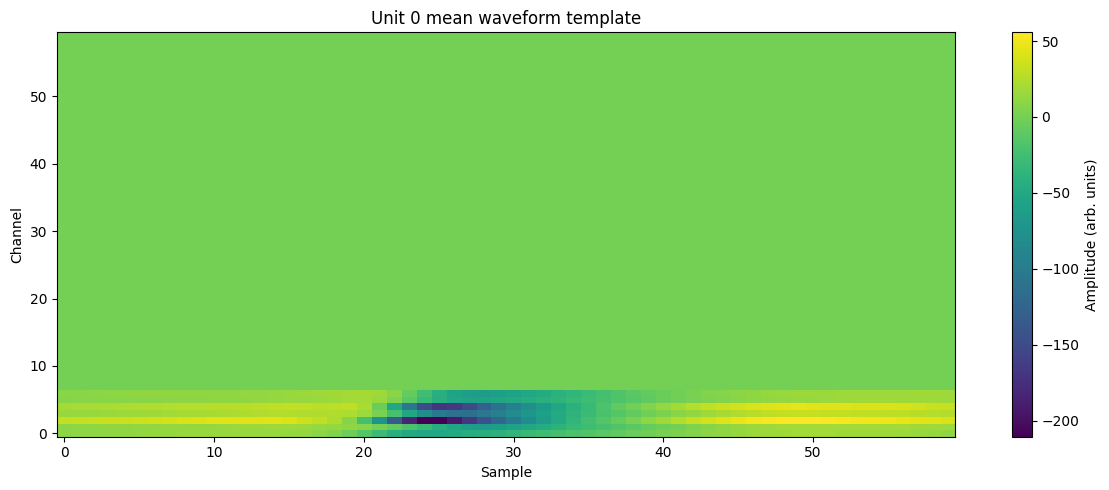

In [7]:

import numpy as np
import spikeinterface.full as si
from neuroconv.tools.spikeinterface import add_sorting_to_nwbfile, add_recording_metadata_to_nwbfile
import pandas as pd
import json
import matplotlib.pyplot as plt


wf = rec.nwb.units['waveform_mean'][1].T



import matplotlib.pyplot as plt

# Grab unit 0 template from NWB

plt.figure(figsize=(12, 5))
im = plt.imshow(wf, aspect="auto", origin="lower")
plt.ylabel("Channel")
plt.xlabel("Sample")
plt.title("Unit 0 mean waveform template")
plt.colorbar(im, label="Amplitude (arb. units)")
plt.tight_layout()
plt.show()


In [8]:
rec['units']

Index    rate      unit_name    quality    aggregation_key    coord_est_x    ...
-------  --------  -----------  ---------  -----------------  -------------  -----
0        12.11924  0            good       0                  -8.33602       ...
1        5.29114   1            good       0                  -19.64126      ...
2        6.97495   3            good       0                  -18.34458      ...
3        0.71799   4            good       0                  -39.35096      ...
4        1.67294   5            good       0                  -48.99011      ...
5        0.99333   8            good       0                  -22.899        ...
6        3.87676   9            good       0                  -18.71961      ...
...      ...       ...          ...        ...                ...            ...
23       1.38567   28           good       3                  465.91434      ...
24       18.56183  29           good       3                  505.90972      ...
25       0.69431   30     